# Exploring generated data

In [1]:
#import statements

import numpy as np
import pandas as pd

import os

['accuracy', 'precision', 'recall', 'f1 normal', 'f1 target', 'mcc']
['accuracy', 'precision', 'recall', 'f1 normal', 'f1 target', 'mcc']
['accuracy', 'precision', 'recall', 'f1 normal', 'f1 target', 'mcc']
['accuracy', 'precision', 'recall', 'f1 normal', 'f1 target', 'mcc']
['accuracy', 'precision', 'recall', 'f1 normal', 'f1 target', 'mcc']
['accuracy', 'precision', 'recall', 'f1 normal', 'f1 target', 'mcc']
----------
 
 Long Training set 
 
 ----------
KNeighborsClassifier().csv
DecisionTreeClassifier().csv
SGDClassifier().csv
LogisticRegression(max_iter=5000).csv
RandomForestClassifier().csv
GradientBoostingClassifier().csv


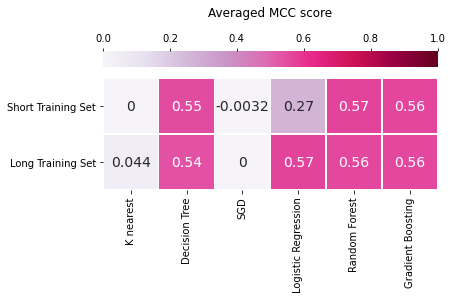

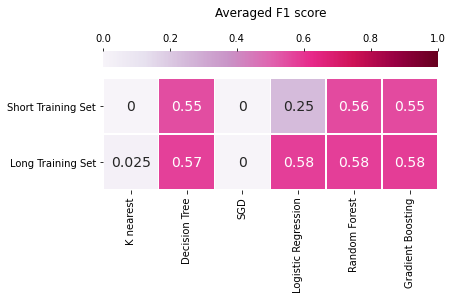

In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

averages = np.ones([2, 6])
f1Target = np.ones([2,6])

models = ['K nearest', 'Decision Tree', 'SGD', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']
idx = 0
for filename in os.listdir('shortTraining'):
	df = pd.read_csv(('shortTraining/' + filename))
	if filename == '.DS_Store':
		continue
	print(list(df.columns))
	averages[0][idx] = df['mcc'].mean()
	f1Target[0][idx] = df['f1 target'].mean()
	idx += 1


print("----------\n \n Long Training set \n \n ----------")
idx = 0
for filename in os.listdir('longTraining'):
	df = pd.read_csv(('longTraining/' + filename))
	if filename == '.DS_Store':
		continue
	print(filename)
	averages[1][idx] = df['mcc'].mean()
	f1Target[1][idx] = df['f1 target'].mean()
	idx += 1


ax = sns.heatmap(averages, annot=True, linewidths=.5, cmap='PuRd', xticklabels=models, yticklabels=["Short Training Set", "Long Training Set"], square=True, cbar_kws = dict(use_gridspec=False,location="top"), vmin=1, vmax=0, annot_kws={"size": 14})
plt.savefig("figures/" + "MCCAverages-both-training", bbox_inches='tight')
plt.title("Averaged MCC score", y=1.5)
plt.show()

ax = sns.heatmap(f1Target, annot=True, linewidths=.5, cmap='PuRd', xticklabels=models, yticklabels=["Short Training Set", "Long Training Set"], square=True, cbar_kws = dict(use_gridspec=False,location="top"), vmin=1, vmax=0, annot_kws={"size": 14})
plt.savefig("figures/" + "F1Target-both-training", bbox_inches='tight')
plt.title("Averaged F1 score", y=1.5)
plt.show()

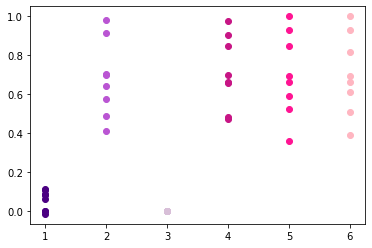

In [3]:
colours = ['indigo', 'mediumorchid', 'thistle', 'mediumvioletred', 'deeppink', 'lightpink']
idx = 1
for filename in os.listdir('longTraining'):
	df = pd.read_csv(('longTraining/' + filename))

	if filename == '.DS_Store':
		continue

	y = df['mcc']
	y = y[2:]
	x = [idx for x in range(8)]
	plt.scatter(x,y, c=colours[idx-1])
	idx += 1
#plt.xticks(models)
#plt.xlabel(models)
plt.show()


### Produce best performances for each class for the best models


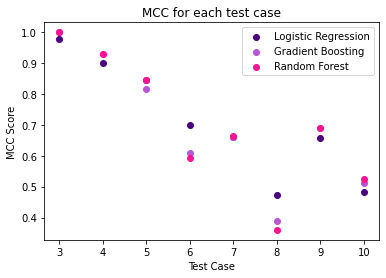

In [4]:
modelFiles = ["longTraining/LogisticRegression(max_iter=5000).csv", "longTraining/GradientBoostingClassifier().csv", "longTraining/RandomForestClassifier().csv" ]
labels = ['Logistic Regression', "Gradient Boosting","Random Forest"]
#colors = ['#b7a8bd','#e32581', '#692A7D']
id = [0,1,4]

idx = 0
for file in modelFiles:
	df = pd.read_csv(file)
	x = [x for x in range(3, 11)]
	y = df['mcc']
	y = y[2:]
	plt.scatter(x, y, label=labels[idx], c=colours[id[idx]])
	idx +=1

plt.title("MCC for each test case")
plt.xlabel("Test Case")
plt.ylabel("MCC Score")
plt.legend()
plt.xticks(x)
plt.savefig("figures/" + "allTestcasesTop3", bbox_inches='tight')
plt.show()

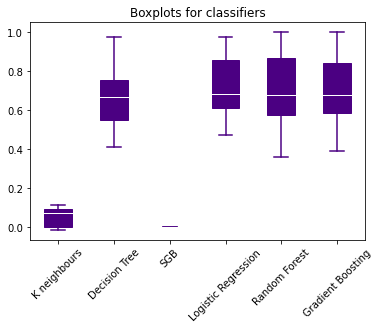

In [5]:
d = []
names = ["K neighbours","Decision Tree", "SGB", "Logistic Regression", "Random Forest", "Gradient Boosting"]

for filename in os.listdir('longTraining'):
	df = pd.read_csv(('longTraining/' + filename))
	if filename == '.DS_Store':
		continue
	x = df['mcc'].to_list()
	x = x[2:]
	d.append(x)

fig, ax = plt.subplots()
ax.boxplot(d, showfliers=True, patch_artist=True, boxprops = dict(linestyle='-', linewidth=1, color=colours[0], facecolor=colours[0]), whiskerprops={"color": colours[0], "linewidth": 1.5}, capprops={"color": colours[0], "linewidth": 1.5},  medianprops={"color": "white", "linewidth": 1})
ax.set_title("Boxplots for classifiers")
ax.set_xticklabels(names, rotation=45)

plt.savefig("figures/" + "boxplots", bbox_inches='tight')
plt.show()


# CReating Graphs for optimised Results


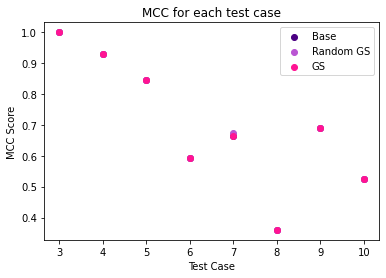

In [6]:
normal = pd.read_csv("longTraining/RandomForestClassifier().csv")
optimise1 = pd.read_csv("optimisedResults/RandomForestImproved.csv")
optimise2 = pd.read_csv("optimisedResults/RandomForestImprovedGridSearch.csv")

d = []

modelFiles = [normal, optimise1, optimise2]
labels = ["Base", "Random GS", "GS"]

idx = 0
for file in modelFiles:
	x = [x for x in range(3, 11)]
	y = file['mcc']
	y = y[2:]
	plt.scatter(x, y, c=colours[id[idx]], label=labels[idx])
	idx +=1

plt.title("MCC for each test case")
plt.xlabel("Test Case")
plt.ylabel("MCC Score")
plt.legend()
plt.xticks(x)
plt.savefig("figures/" + "RoundsOptimis", bbox_inches='tight')
plt.show()


RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=4,
                       n_estimators=1900)
testdata/Test9 Mixed1.csv


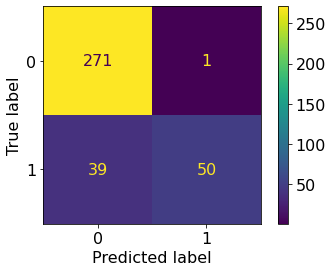

testdata/Test10 Mixed2.csv


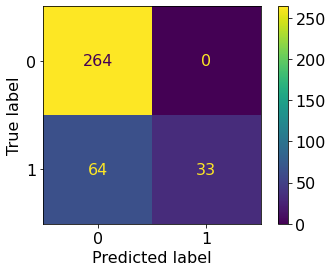

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=2000, random_state=42)
testdata/Test9 Mixed1.csv


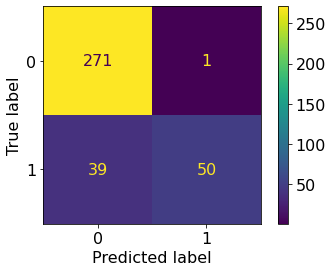

testdata/Test10 Mixed2.csv


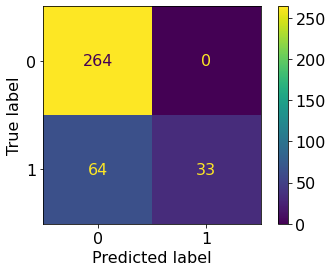

In [7]:
from functions import * 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
from matplotlib import cm

files = ['testdata/Test9 Mixed1.csv','testdata/Test10 Mixed2.csv']
models = ['models/bestRandomForest.sav', 'models/randomisedOptimisedRandomForest.sav']
spring = cm.get_cmap('spring')
names = ['RandomGSt9', 'RandomGSt10', 'ExhastiveGSt9', 'ExhaustiveGSt10']
plt.rcParams.update({'font.size': 16})
i = 0
for m in models:
	model = pickle.load(open(m, 'rb'))
	print(model)
	for file in files:
		f = pd.read_csv(file)
		features = generateFeatures(f)
		y = y_values(f, features)

		pred = model.predict(features)
		print(file)
		matrix = confusion_matrix(y, pred, labels=model.classes_)
		disp = ConfusionMatrixDisplay(confusion_matrix=matrix,  display_labels=model.classes_)
		disp.plot()
		plt.savefig('figures/' + names[i], bbox_inches='tight')
		plt.show()
		i += 1
